In [1]:
import pandas

data = pandas.read_csv('gbm-data.csv')
data = data.values

Загрузите выборку из файла gbm-data.csv с помощью pandas и преобразуйте ее в массив numpy (параметр values у датафрейма). В первой колонке файла с данными записано, была или нет реакция. Все остальные колонки (d1 - d1776) содержат различные характеристики молекулы, такие как размер, форма и т.д. Разбейте выборку на обучающую и тестовую.

In [2]:
from sklearn.cross_validation import train_test_split

react_res = []
react_char =[]

for i in data:
    react_res.append(i[0])
    react_char.append(i[1:])
    
react_char_train, react_char_test, react_res_train, react_res_test = train_test_split(react_char,
                                                                                     react_res,
                                                                                     test_size = 0.8,
                                                                                     random_state = 241)


c:\python27\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


Обучите GradientBoostingClassifier с параметрами n_estimators=250, verbose=True, random_state=241 и для каждого значения learning_rate из списка [1, 0.5, 0.3, 0.2, 0.1] проделайте следующее
    Используйте метод staged_decision_function для предсказания качества на обучающей и тестовой выборке на каждой итерации.
    
    Преобразуйте полученное предсказание с помощью сигмоидной функции по формуле 1 / (1 + e^{−y_pred}), где y_pred — предсказанное значение.
    
    Вычислите и постройте график значений log-loss (которую можно посчитать с помощью функции sklearn.metrics.log_loss) на обучающей и тестовой выборках, а также найдите минимальное значение метрики и номер итерации, на которой оно достигается.

      Iter       Train Loss   Remaining Time 
         1           1.2613           13.45s
         2           1.1715           12.90s
         3           1.1009           12.76s
         4           1.0529           13.04s
         5           1.0130           13.13s
         6           0.9740           12.97s
         7           0.9475           12.50s
         8           0.9197           12.49s
         9           0.8979           12.18s
        10           0.8730           12.17s
        20           0.7207           10.05s
        30           0.6055            9.23s
        40           0.5244            8.64s
        50           0.4501            8.24s
        60           0.3908            7.84s
        70           0.3372            7.53s
        80           0.3009            7.13s
        90           0.2603            6.71s
       100           0.2327            6.23s
       200           0.0835            2.14s
0.53
36


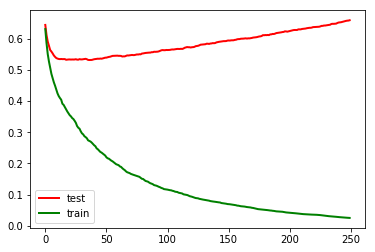

In [42]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import log_loss
import numpy as np 
import math
import matplotlib.pyplot as plt
%matplotlib inline

def sigm_func(y_pred):
    res =  1.0 / (1.0 + np.exp(-1*y_pred))
    return res

l_rate = [1, 0.5, 0.3, 0.2, 0.1] 

for i in l_rate:
    log_loss_train =[]
    log_loss_test = []
    gbc = GradientBoostingClassifier(n_estimators=250, 
                                     verbose=True,
                                     random_state=241,
                                     learning_rate = i)
    gbc.fit(react_char_train, react_res_train)

    iter_train = gbc.staged_decision_function(react_char_train)
    iter_test = gbc.staged_decision_function(react_char_test)

    for i in iter_train:
        for j in i:
            j[0] = sigm_func(j[0])
        
        log_loss_train.append(log_loss(react_res_train, i))
            
    for i in iter_test:
        for j in i:
            j[0] = sigm_func(j[0])
            
        log_loss_test.append(log_loss(react_res_test, i))
        
    plt.figure()
    plt.plot(log_loss_test, 'r', linewidth=2)
    plt.plot(log_loss_train, 'g', linewidth=2)
    plt.legend(['test', 'train'])
    
    print round(min(log_loss_test), 2)
    print log_loss_test.index(min(log_loss_test))

На этих же данных обучите RandomForestClassifier с количеством деревьев, равным количеству итераций, на котором достигается наилучшее качество у градиентного бустинга из предыдущего пункта. Какое значение log-loss на тесте получается у этого случайного леса?

In [45]:
from sklearn.ensemble import GradientBoostingClassifier

clf = GradientBoostingClassifier(n_estimators = 36, random_state=241)
clf.fit(react_char_train, react_res_train)

res = clf.predict_proba(react_char_test)

print round(log_loss(react_res_test, res), 2)

0.53
